# Simple linear ML linear supervised task

In [1]:
import sys
sys.path.insert(0,'../')

In [2]:
from matplotlib import pyplot as plt
import pandas as pd

from tensorflow.keras.experimental import LinearModel
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

from decentralized_smart_grid_ml.federated_learning import models_reader_writer

2021-10-03 15:43:05.371248: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-03 15:43:05.371280: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
plt.style.use('seaborn')

First of all, we generate a linear separable dataset

In [4]:
# constants
n_samples = 500
n_classes = 2
n_features = 2
seed = 42
epochs = 10
test_size = 0.2
TASK_PATH = "../data_sample/simple_ml_task/" 

In [5]:
x, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=2, center_box=(0, 15), random_state=seed)

Plot the dataset

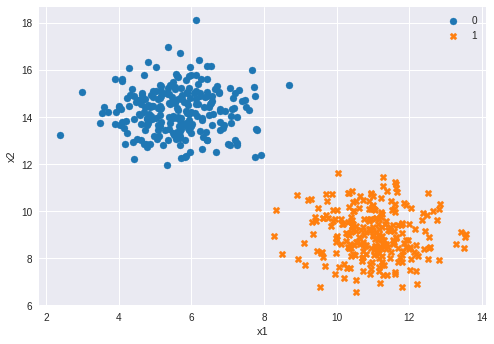

In [6]:
plt.scatter(x[:, 0][y == 0], x[:, 1][y == 0], color='tab:blue', marker='o', label="0")
plt.scatter(x[:, 0][y == 1], x[:, 1][y == 1], color='tab:orange', marker='X', label="1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

Save the dataset in a csv

In [7]:
database_path = TASK_PATH + "simple_ml_task.csv"

In [8]:
df_dataset = pd.DataFrame({"x1": x[:, 0], "x2": x[:, 1], "y": y})
display(df_dataset.head())
df_dataset.to_csv(database_path)

,x1,x2,y
0,5.138928,14.075056,0
1,4.102911,15.627589,0
2,4.643420,15.047799,0
3,5.490184,13.305174,0
4,10.030510,11.612259,1


Split the whole dataset in train and test sets

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

Train a simple linear classifier

In [10]:
model = LinearModel(activation="sigmoid")
model.compile(optimizer="sgd", loss="mse", metrics="accuracy")

2021-10-03 15:43:54.831669: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-03 15:43:54.831706: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-03 15:43:54.831742: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Lenovo-ideapad): /proc/driver/nvidia/version does not exist
2021-10-03 15:43:54.832097: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.fit(x_train, y_train, epochs=epochs)

2021-10-03 15:43:55.804275: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
13/13 [==============================] - 0s 1ms/step - loss: 0.2089 - accuracy: 0.8150
Epoch 2/10
13/13 [==============================] - 0s 1ms/step - loss: 0.1405 - accuracy: 0.9950
Epoch 3/10
13/13 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 1.0000
Epoch 4/10
13/13 [==============================] - 0s 1ms/step - loss: 0.0793 - accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 1.0000
Epoch 8/10
13/13 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 1.0000
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 1.0000
Epoch 10/10
13/13 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 1.0000


In [12]:
print("Train evaluation")
metrics_train = model.evaluate(x_train, y_train)
print("Test evaluation")
metrics_test = model.evaluate(x_test, y_test)

Train evaluation
13/13 [==============================] - 0s 1ms/step - loss: 0.0312 - accuracy: 1.0000
Test evaluation
4/4 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 1.0000


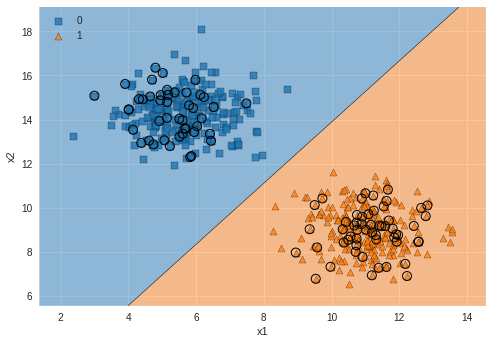

In [13]:
plot_decision_regions(x, y, clf=model, legend=2, X_highlight=x_test)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Now we will save the model using the API functions

In [14]:
model_path = TASK_PATH + "linear_model"
model_config_path = TASK_PATH + "linear_model_config.json"
model_weights_path = TASK_PATH + "linear_model_weights.json"

Save the whole tensorflow model

In [15]:
models_reader_writer.save_fl_model(model, model_path)

2021-10-03 15:44:26.499865: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../data_sample/simple_ml_task/linear_model/assets
2021-10-03 15:44:26,805 - decentralized_smart_grid_ml.federated_learning.models_reader_writer - INFO - Model saved in directory ../data_sample/simple_ml_task/linear_model


Save the model's config in a json file

In [16]:
models_reader_writer.save_fl_model_config(model, model_config_path)

2021-10-03 15:44:27,331 - decentralized_smart_grid_ml.federated_learning.models_reader_writer - INFO - Model's config saved in ../data_sample/simple_ml_task/linear_model_config.json


Save the model's weights in a json file

In [17]:
models_reader_writer.save_fl_model_weights(model, model_weights_path)

2021-10-03 15:44:28,343 - decentralized_smart_grid_ml.federated_learning.models_reader_writer - INFO - Model's weights saved in ../data_sample/simple_ml_task/linear_model_weights.json


Then, we try to reconstruct the model

In [18]:
reconstructed_model = models_reader_writer.load_fl_model(model_path)

2021-10-03 15:44:29,456 - decentralized_smart_grid_ml.federated_learning.models_reader_writer - INFO - Load model from  ../data_sample/simple_ml_task/linear_model


In [19]:
reconstructed_metrics_test = reconstructed_model.evaluate(x_test, y_test)
assert reconstructed_metrics_test==metrics_test

4/4 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 1.0000


Try to load the model's weights

In [20]:
model_weights = models_reader_writer.load_fl_model_weights(model_weights_path)
print(model_weights)

2021-10-03 15:44:30,836 - decentralized_smart_grid_ml.federated_learning.models_reader_writer - INFO - Loaded model's weights from ../data_sample/simple_ml_task/linear_model_weights.json
[array([[ 0.37543675],
       [-0.27067289]]), array([0.00543931])]


We assign the loaded model's weights to a new model with the same structure

In [21]:
copy_model = LinearModel(activation="sigmoid")
copy_model.compile(optimizer="sgd", loss="mse", metrics="accuracy")
# fake training of the model
copy_model.fit(x_train, y_train, epochs=1) 

13/13 [==============================] - 0s 1ms/step - loss: 0.2085 - accuracy: 0.8175


In [22]:
copy_model_metrics_test = copy_model.evaluate(x_test, y_test)
# trivially the results are different beacuse they are two different models 
assert copy_model_metrics_test!=metrics_test

4/4 [==============================] - 0s 1ms/step - loss: 0.1617 - accuracy: 1.0000


In [23]:
copy_model.set_weights(model_weights)

In [24]:
copy_model_metrics_test = copy_model.evaluate(x_test, y_test)
assert copy_model_metrics_test==metrics_test

4/4 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 1.0000
